# Binary Classification of Malignancy in Tumours

In [1]:
import sklearn as sk
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sb

from pylab import rcParams

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib inline
rcParams["figure.figsize"] = 20,20
sb.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
concat = dataset.rename(index=str, columns={"id": 'DROPPED', "Unnamed: 32": 'DROPPED', "diagnosis": 'BINARY ENCODED'}).columns.values

In [4]:
DataDictionary = pd.DataFrame(dataset.columns.values)
DataDictionary = pd.concat([DataDictionary,pd.DataFrame(dataset.dtypes.values),pd.DataFrame(concat)],axis=1)
DataDictionary.columns = ['Source','Datatype','Modification']

In [5]:
scaledFeatures = []
for i in np.arange(len(DataDictionary)):
     if DataDictionary['Source'][i] == DataDictionary['Modification'][i]:
        scaledFeatures.append(DataDictionary['Modification'][i])

DataDictionary['Modification'] = pd.DataFrame(DataDictionary['Modification'].replace(scaledFeatures, 'SCALED'))
DataDictionary

,Source,Datatype,Modification
0,id,int64,DROPPED
1,diagnosis,object,BINARY ENCODED
2,radius_mean,float64,SCALED
3,texture_mean,float64,SCALED
4,perimeter_mean,float64,SCALED
5,area_mean,float64,SCALED
6,smoothness_mean,float64,SCALED
7,compactness_mean,float64,SCALED
8,concavity_mean,float64,SCALED
9,concave points_mean,float64,SCALED


# Data Preperation and Preprocessing

Removed any columns that are not relevant to the analysis. In this case there is an ID that is not statistically relevant to and a Unnamed column that holds no data. Everything else could potentially be relvant to the prediction at this point.

In [6]:
df = dataset.drop(['id','Unnamed: 32'], axis=1)

The next task is looking and whether the dataset is imbalanced.

0.37 Positive within this dataset.


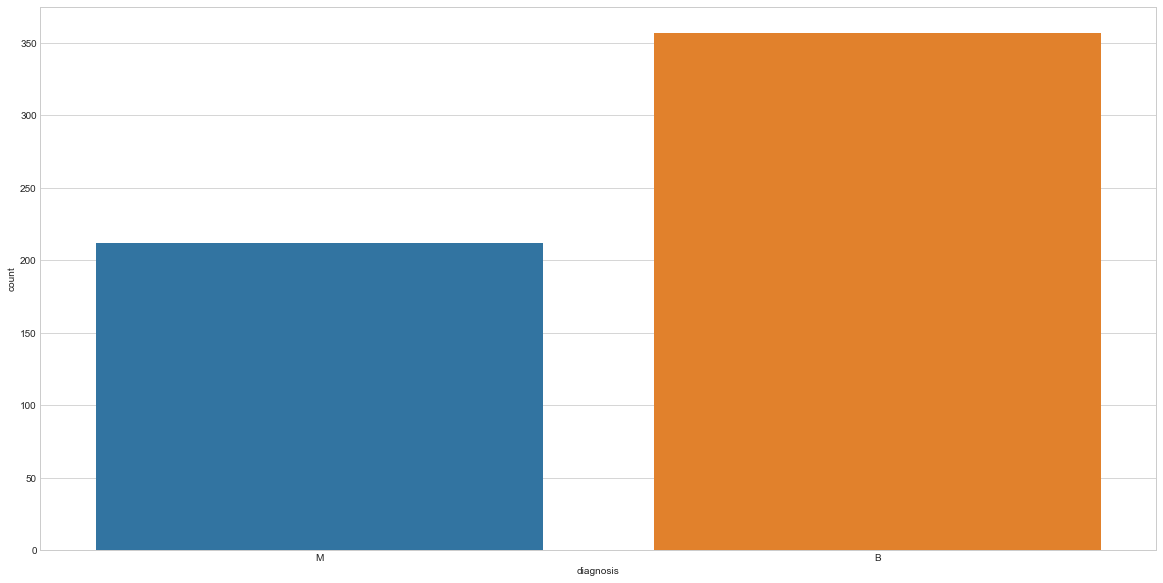

In [7]:
plt.figure(figsize=(20,10))
sb.countplot(x='diagnosis', data=df)

maligantRate = df['diagnosis'][df['diagnosis'] == 'M'].count() / df['diagnosis'].count()
print(maligantRate.round(2), 'Positive within this dataset.')

The prediction that the model will target is the diagnosis column. This is a binary classification problem where the two possible outcomes are that the suspect tissue is either benign or malignant. This will need to be encoded(1 and 0 respectively) as the current datatype is a string object and will not work as an input argument for the classification algorithm. More exploration of the structure of the dataset is needed. About a third of the data is classed as Malignant. The rest is Benign. This data set is imbalanced so I might need to look at how this affects the performance metrics.

In [8]:
encoder = preprocessing.LabelEncoder()
df.diagnosis = encoder.fit_transform(df.diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


0.5 % Positive within this dataset.


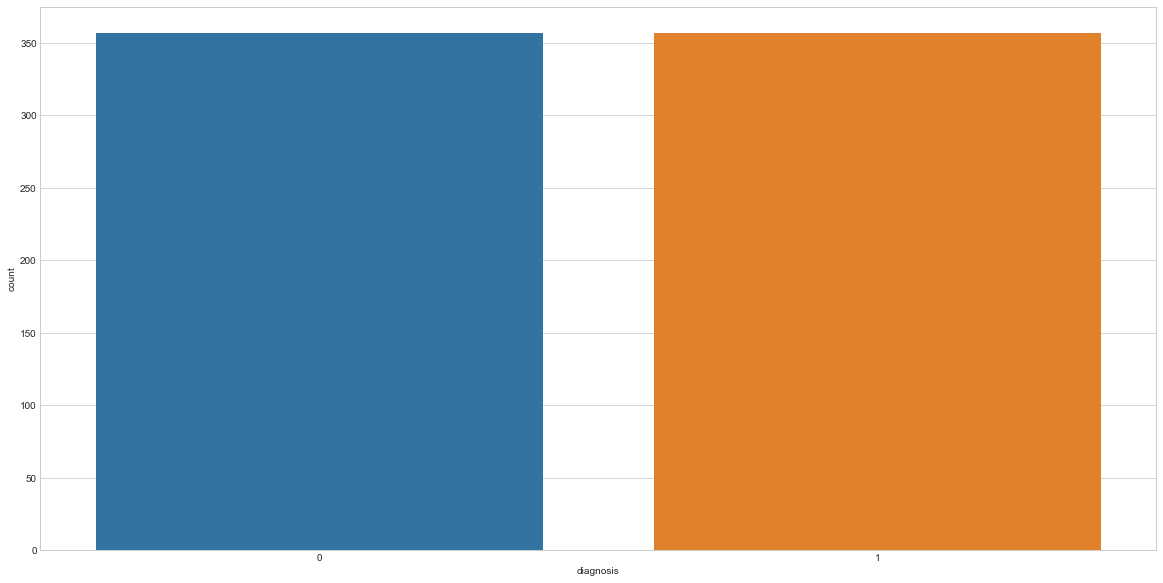

In [17]:
df_minor = df[df['diagnosis']==1]
df_major = df[df['diagnosis']==0]

upsampled_minority = resample(df_minor, replace=True, n_samples=357, random_state=7)

df_upsampled = pd.concat([df_major, upsampled_minority])

df = df_upsampled
plt.figure(figsize=(20,10))
sb.countplot(x='diagnosis', data=df)

maligantRate = df['diagnosis'][df['diagnosis'] == 1].count() / df['diagnosis'].count()
print(maligantRate.round(2), '% Positive within this dataset.')

Because the majority the datasets column holds continous float values, I suspect that there might be unit varience(diffrent meaning being the numbers). Next I will normalize/scale the data using a the standard scaler object.

In [10]:
scaler = preprocessing.StandardScaler()
_df = scaler.fit_transform(df)
_df = pd.DataFrame(_df, columns=df.columns.values)
_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Exploration

Now that the data is clean, balanced and normalized, it is time to look at feature engineering. The goal is to produce suitable inputs for the learning algorithm by looking at what features are the most useful when trying to classify the datapoints. The first task will explore how the two classes features are distributed to see if there may be any distinctive seperations can be made.

The dataframe contains 30 feature columns, to compare them the dataframe is split into "malignant" and "benign". Looping through each feature and plotting a comparison between each class for the same feature on subplotted histograms superimposed over on another.

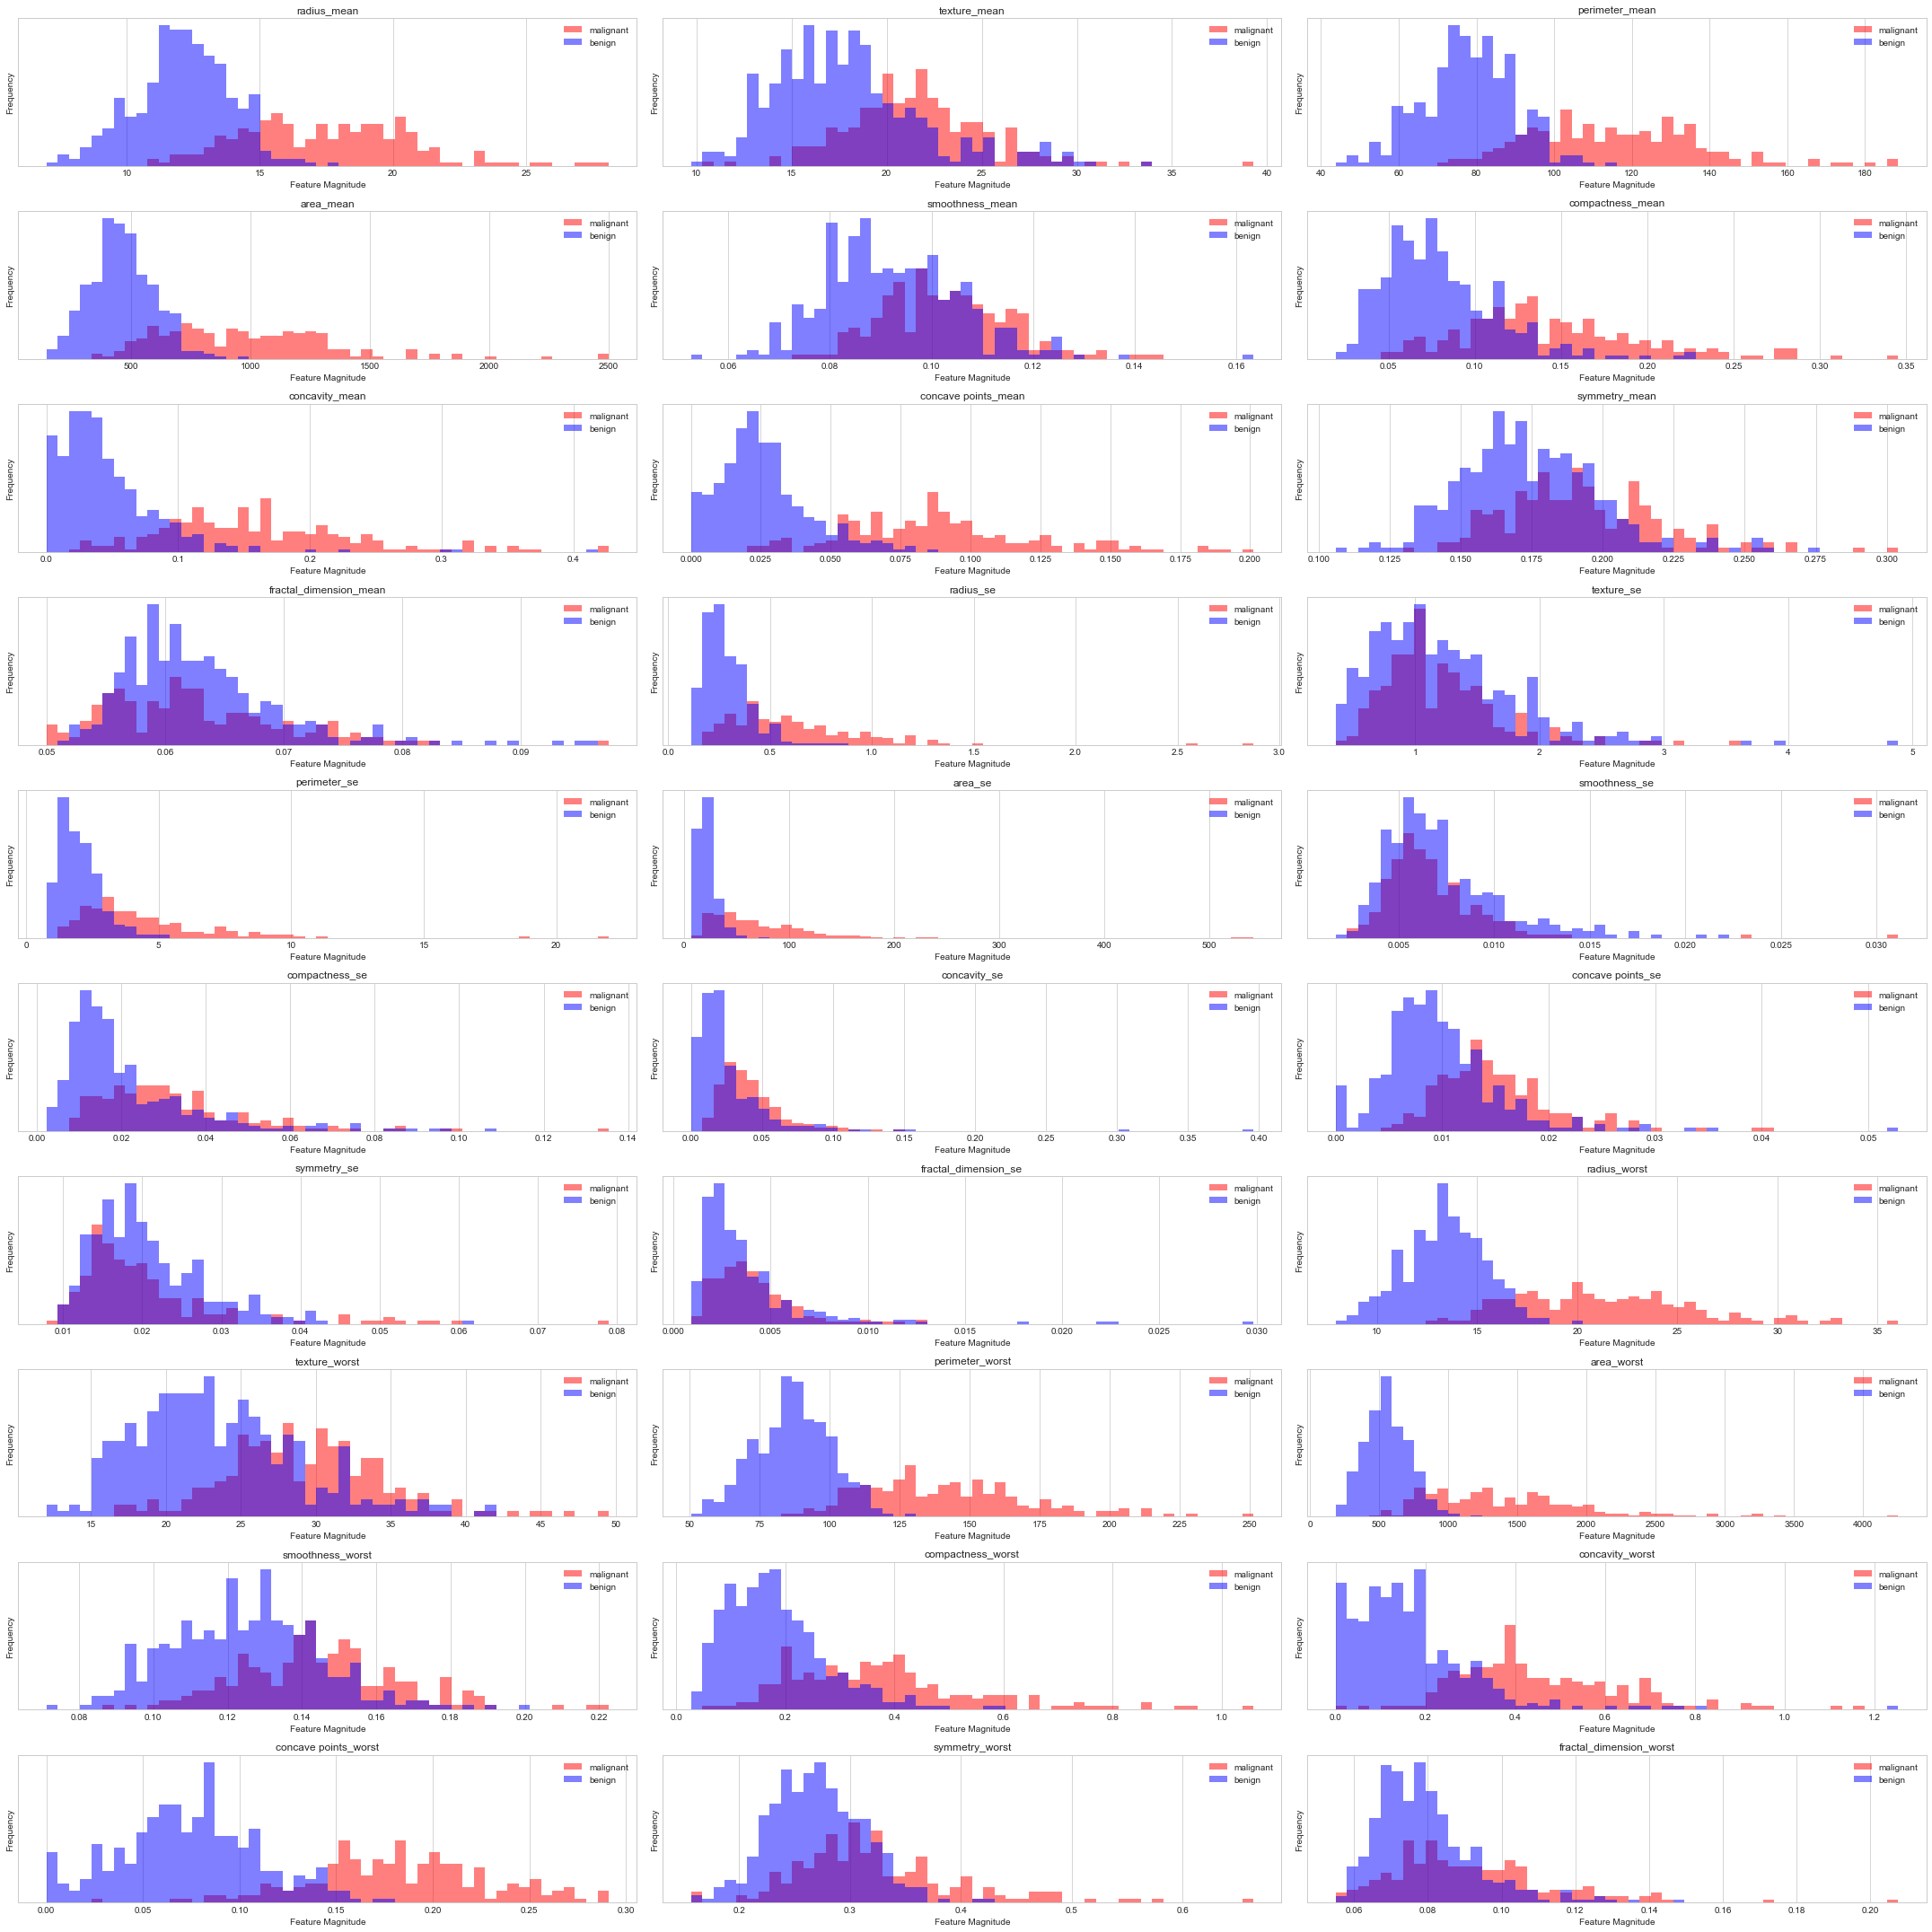

In [11]:
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]

fig, axes = plt.subplots(10, 3, figsize=(30,30))
ax = axes.ravel()


for i in range(30):
    l=i+1
    _, bins = np.histogram(df.iloc[:, l], bins=50)
    ax[i].hist(malignant.iloc[:, l], color='red', bins=bins, alpha=.5)
    ax[i].hist(benign.iloc[:, l], color='blue', bins=bins, alpha=.5)
    ax[i].set_title(df.columns[l])
    ax[i].set_yticks(())
    
    ax[i].set_xlabel("Feature Magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["malignant", "benign"], loc="best")

fig.tight_layout()

This has revealed some potential features that might be used to classify the risk. For example, concave worst_points has a nice seperation in magnitude between classes, and radius_worst has as an even more distinct seperation in magnitude. Next, further validation that there actually is a distictive difference between malignant and benign features will be done using pricible component analysis(PCA) visualized. This also might give a good indication of the type of model algorithm could be used to classify the features and we can look at if there are any relations between the features.

# Princible Component Analysis

Text(0,0.5,'Explained Varience')

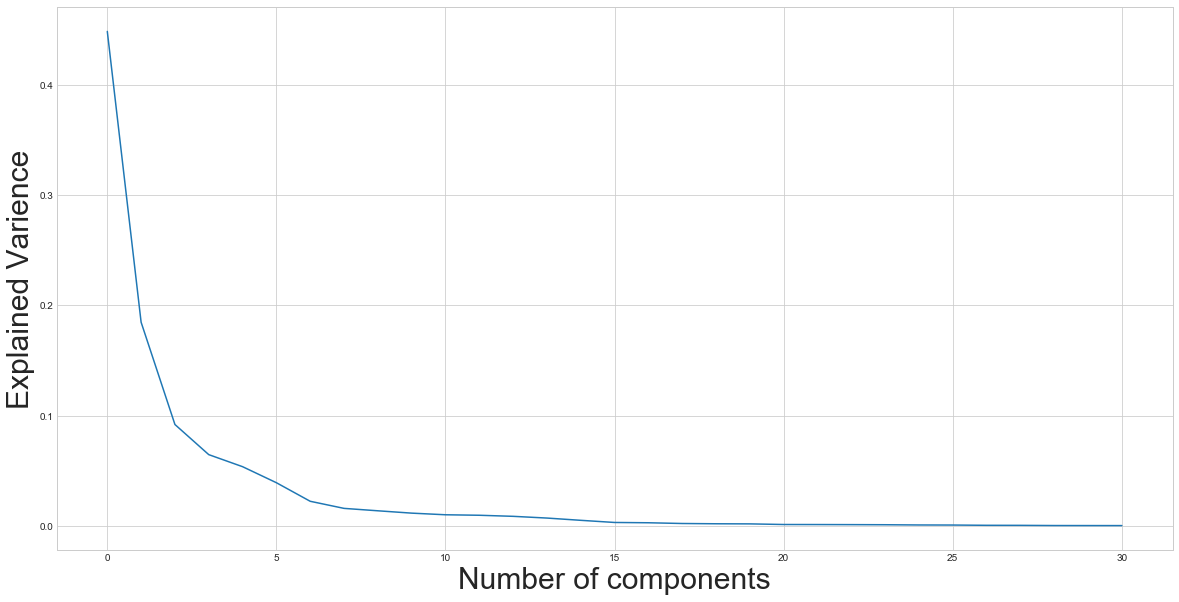

In [12]:
pca = PCA()
pca.fit(_df)
xPCA = pca.transform(_df)

plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of components", fontsize=30)
plt.ylabel("Explained Varience", fontsize=30)

This scree plot shows that about 3 components hold over .7 of varience the others are just noise. We will only select those and discard of the rest.

In [13]:
pca = PCA(n_components=3)
pca.fit(_df)
xPCA = pca.transform(_df)
print("Residual infomation left after compression: {}" . format(pca.explained_variance_ratio_.sum()))

Residual infomation left after compression: 0.7255152452459445


Rule of thumb is to keep over 70 percent of the infomation.

In [14]:
print("Original: {}". format(str(_df.shape)))
print("Major Components: {}". format(str(xPCA.shape)))

Original: (569, 31)
Major Components: (569, 3)


# Cluster Analysis 

Because there were three components, I figured that i could rotate the cluster in three axis to see the seperation from diffrent views.

## Side View

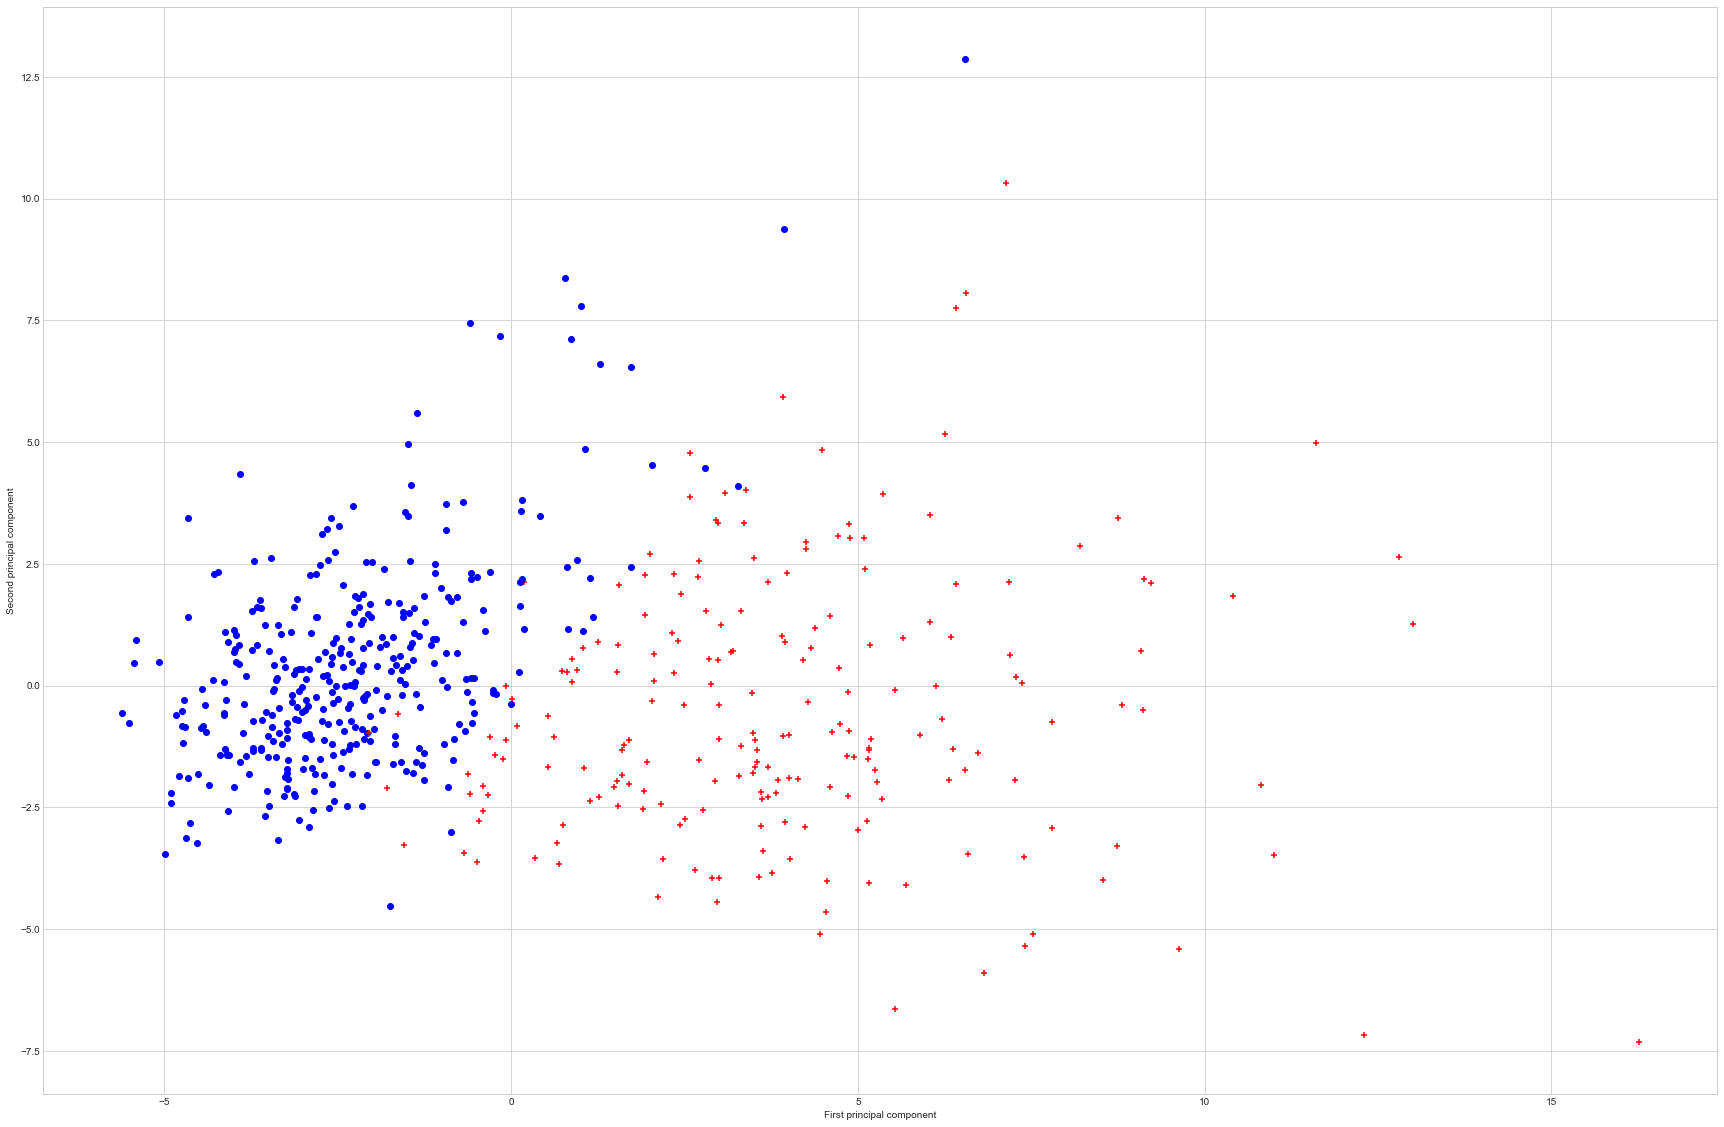

In [15]:
plt.figure(figsize=(30,20))
r = _df.shape[0]

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

for i in range(r):
    
    if df.iloc[i][0]:
        marker = '+'
        color='red'
        label='Malignant'
    else:
        marker = 'o'
        color='blue'
        label='Benign'
    
    plt.scatter(xPCA[i,0],xPCA[i,1], marker=marker , color=color, label=label)

# Top View

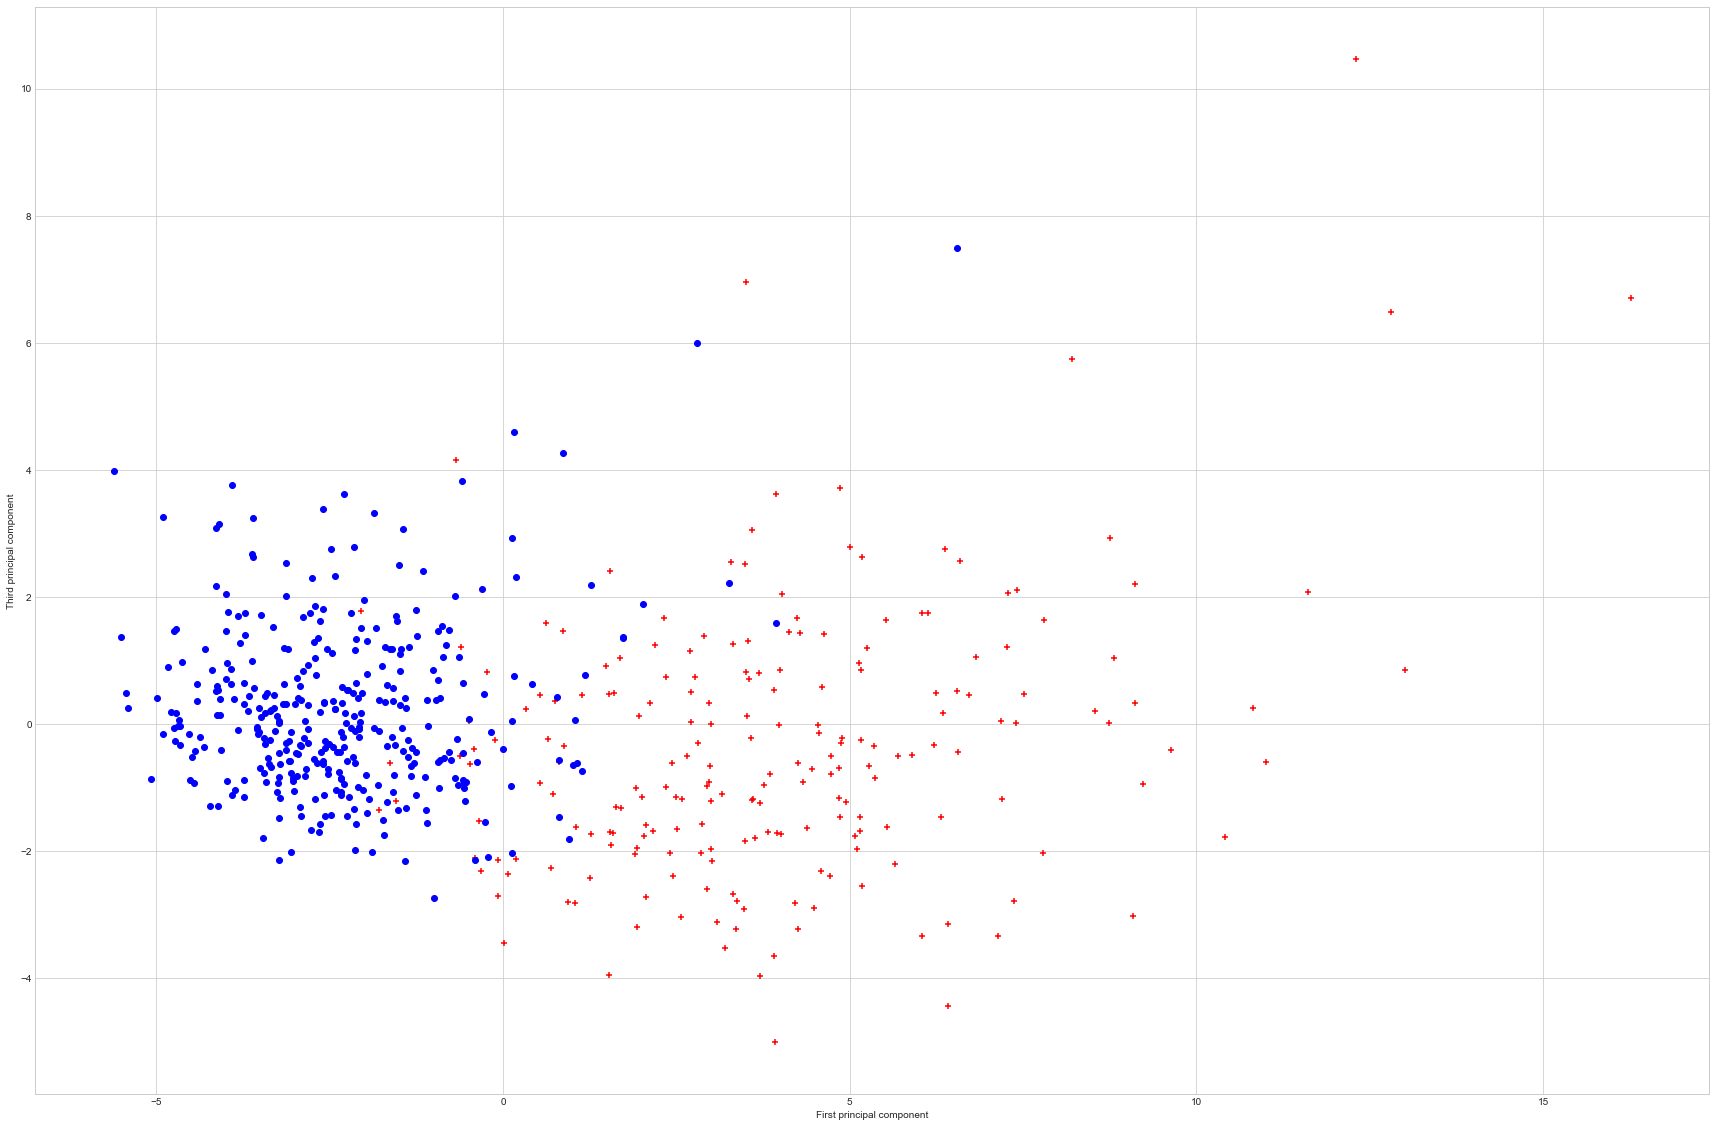

In [16]:
plt.figure(figsize=(30,20))
r = _df.shape[0]

plt.xlabel("First principal component")
plt.ylabel("Third principal component")

for i in range(r):
    
    if df.iloc[i][0]:
        marker = '+'
        color='red'
        label='Malignant'
    else:
        marker = 'o'
        color='blue'
        label='Benign'
    
    plt.scatter(xPCA[i,0],xPCA[i,2], marker=marker , color=color, label=label)

## Face View

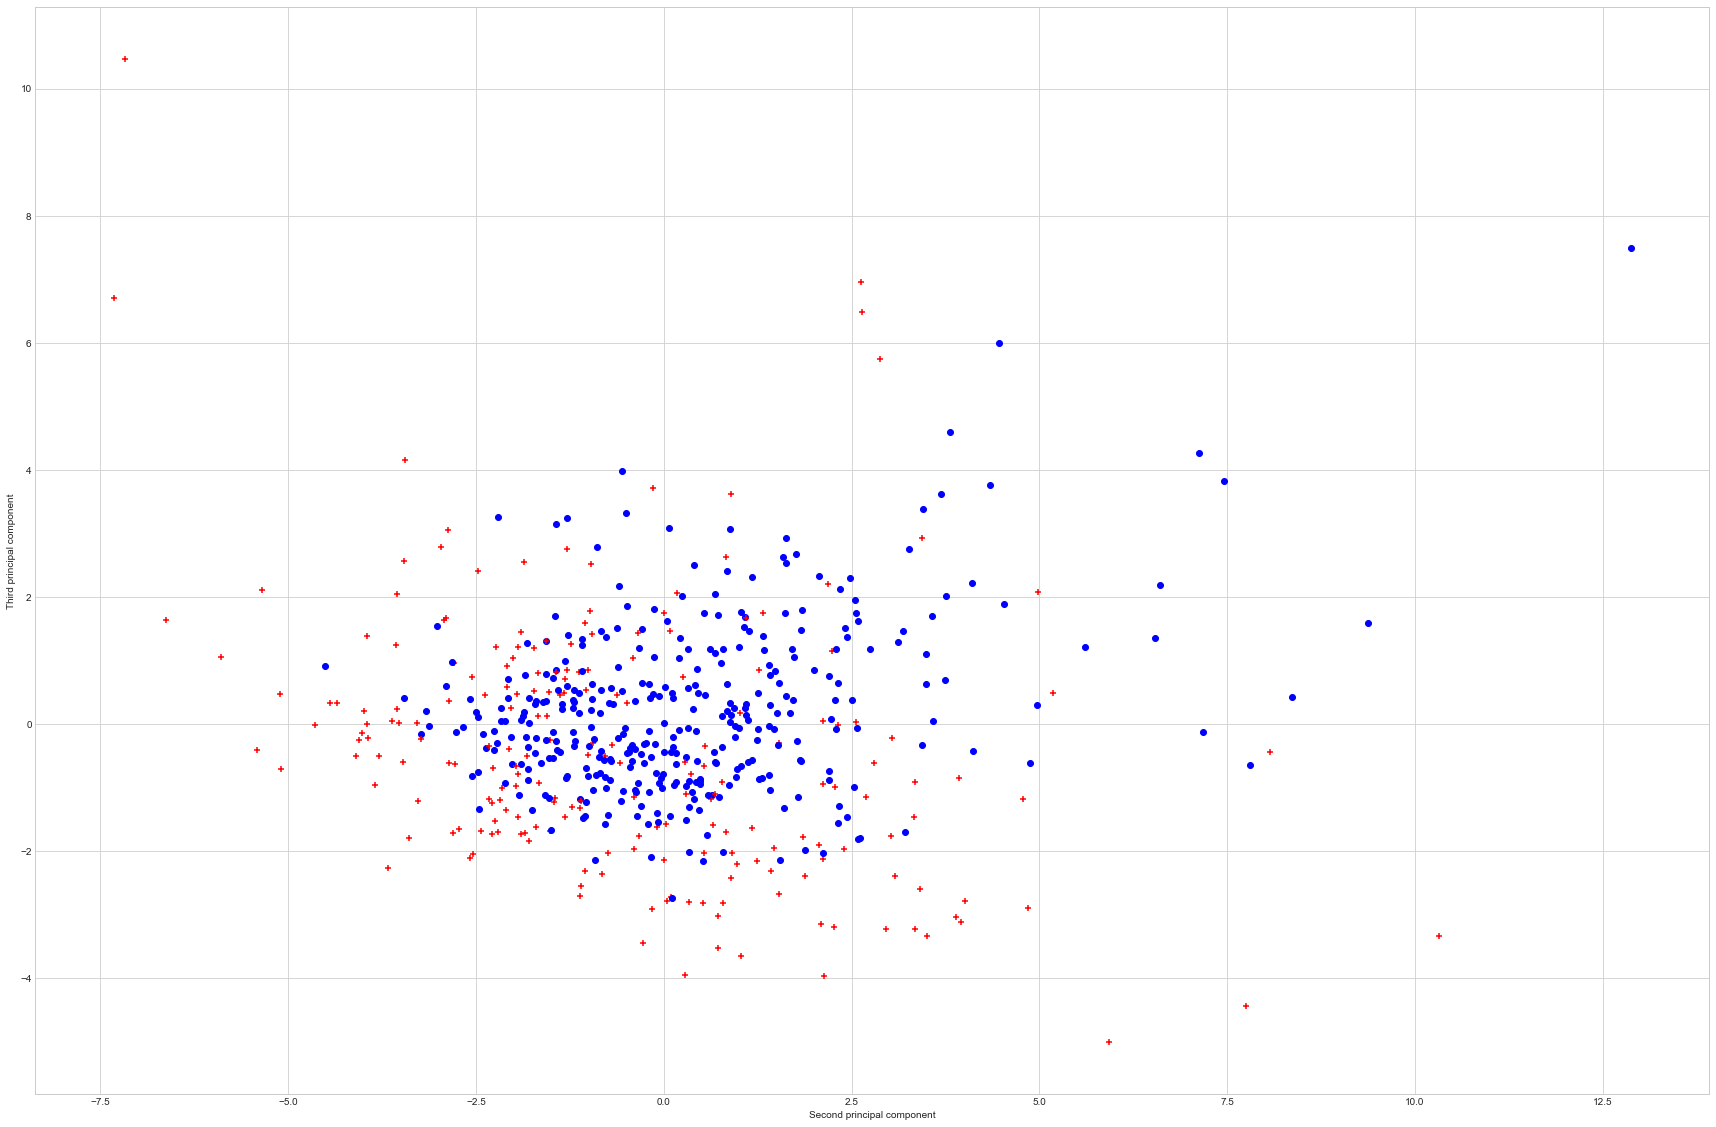

In [17]:
plt.figure(figsize=(30,20))
r = df.shape[0]

plt.xlabel("Second principal component")
plt.ylabel("Third principal component")

for i in range(r):
    
    if df.iloc[i][0]:
        marker = '+'
        color='red'
        label='Malignant'
    else:
        marker = 'o'
        color='blue'
        label='Benign'
    
    plt.scatter(xPCA[i,1],xPCA[i,2], marker=marker , color=color, label=label)

This cluster analysis helps provide insight into the potential regression model we could use. Eyballing the clusters shows a clear distinction between the two classses in the way they are clustered. Malignant instances tend to be more spread across X(PC1). This makes sense because histograms earlier shows that maligant features tend to be more spread out along the distribution. This proves that we can make a healthy seperation with the correct component features. A good idea will be to try and project where the original features hold the greatest weights of effect over this PCA clustster. This is called a biplot, effectivly a combination of Score Plot and a Loading Plot that maps the feature vectors. This will help to see how the orginal features affect the clusters/data points and diagnosis. It will also provide a clear insight to what features are highly correlated.

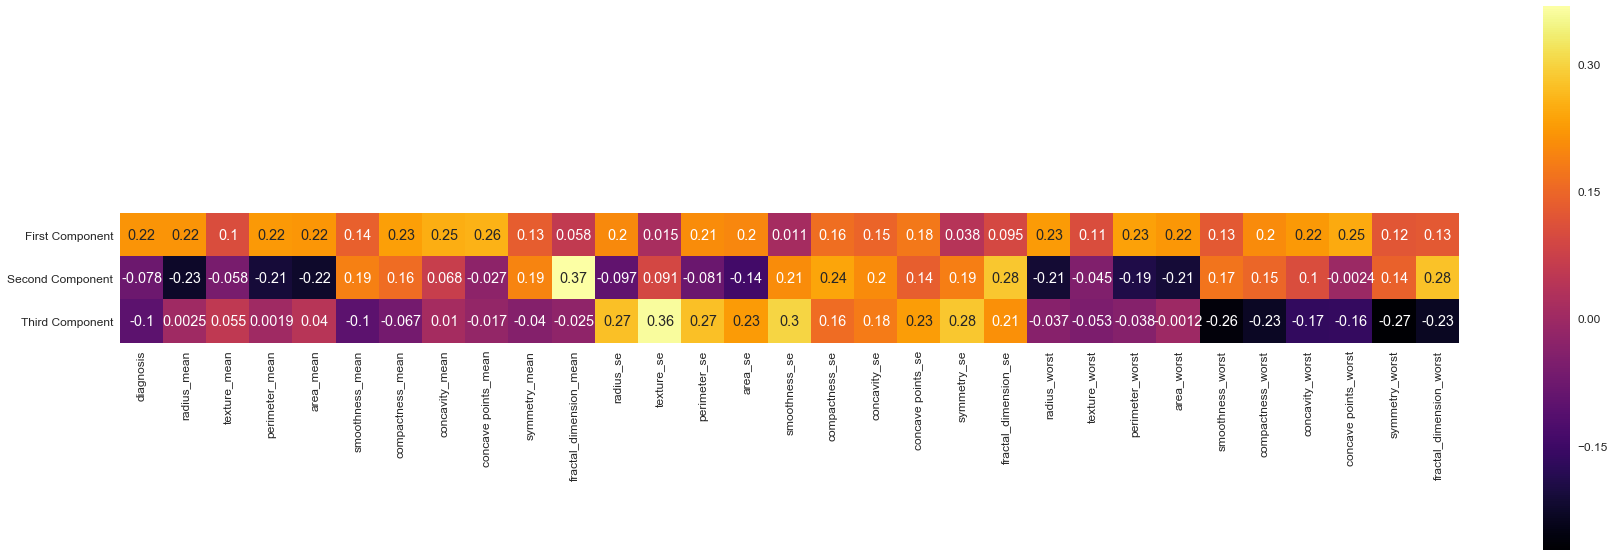

In [18]:
columnRange = range(len(list(df)))
sb.set(font_scale=1.2)
plt.figure(figsize=(30,10))
sb.heatmap(pca.components_, 
           cmap='inferno', 
           annot=True, 
           square=True, 
           xticklabels=df.columns.values, 
           yticklabels=['First Component', 'Second Component', 'Third Component']
          )

The first component shows a general correlation between a high majority of features which means that multiple features might be relevant to making class distinctions. If a good predictive feature is high the others is likley to follow and vice versa. This means that we risk multicoliniarity and reducing the features is a must. The histogram earlier will help in making better feature choices as it shows where the best distinction are. The issue now is the follow ocams razor and reduce the amount of features to the most important predictors.

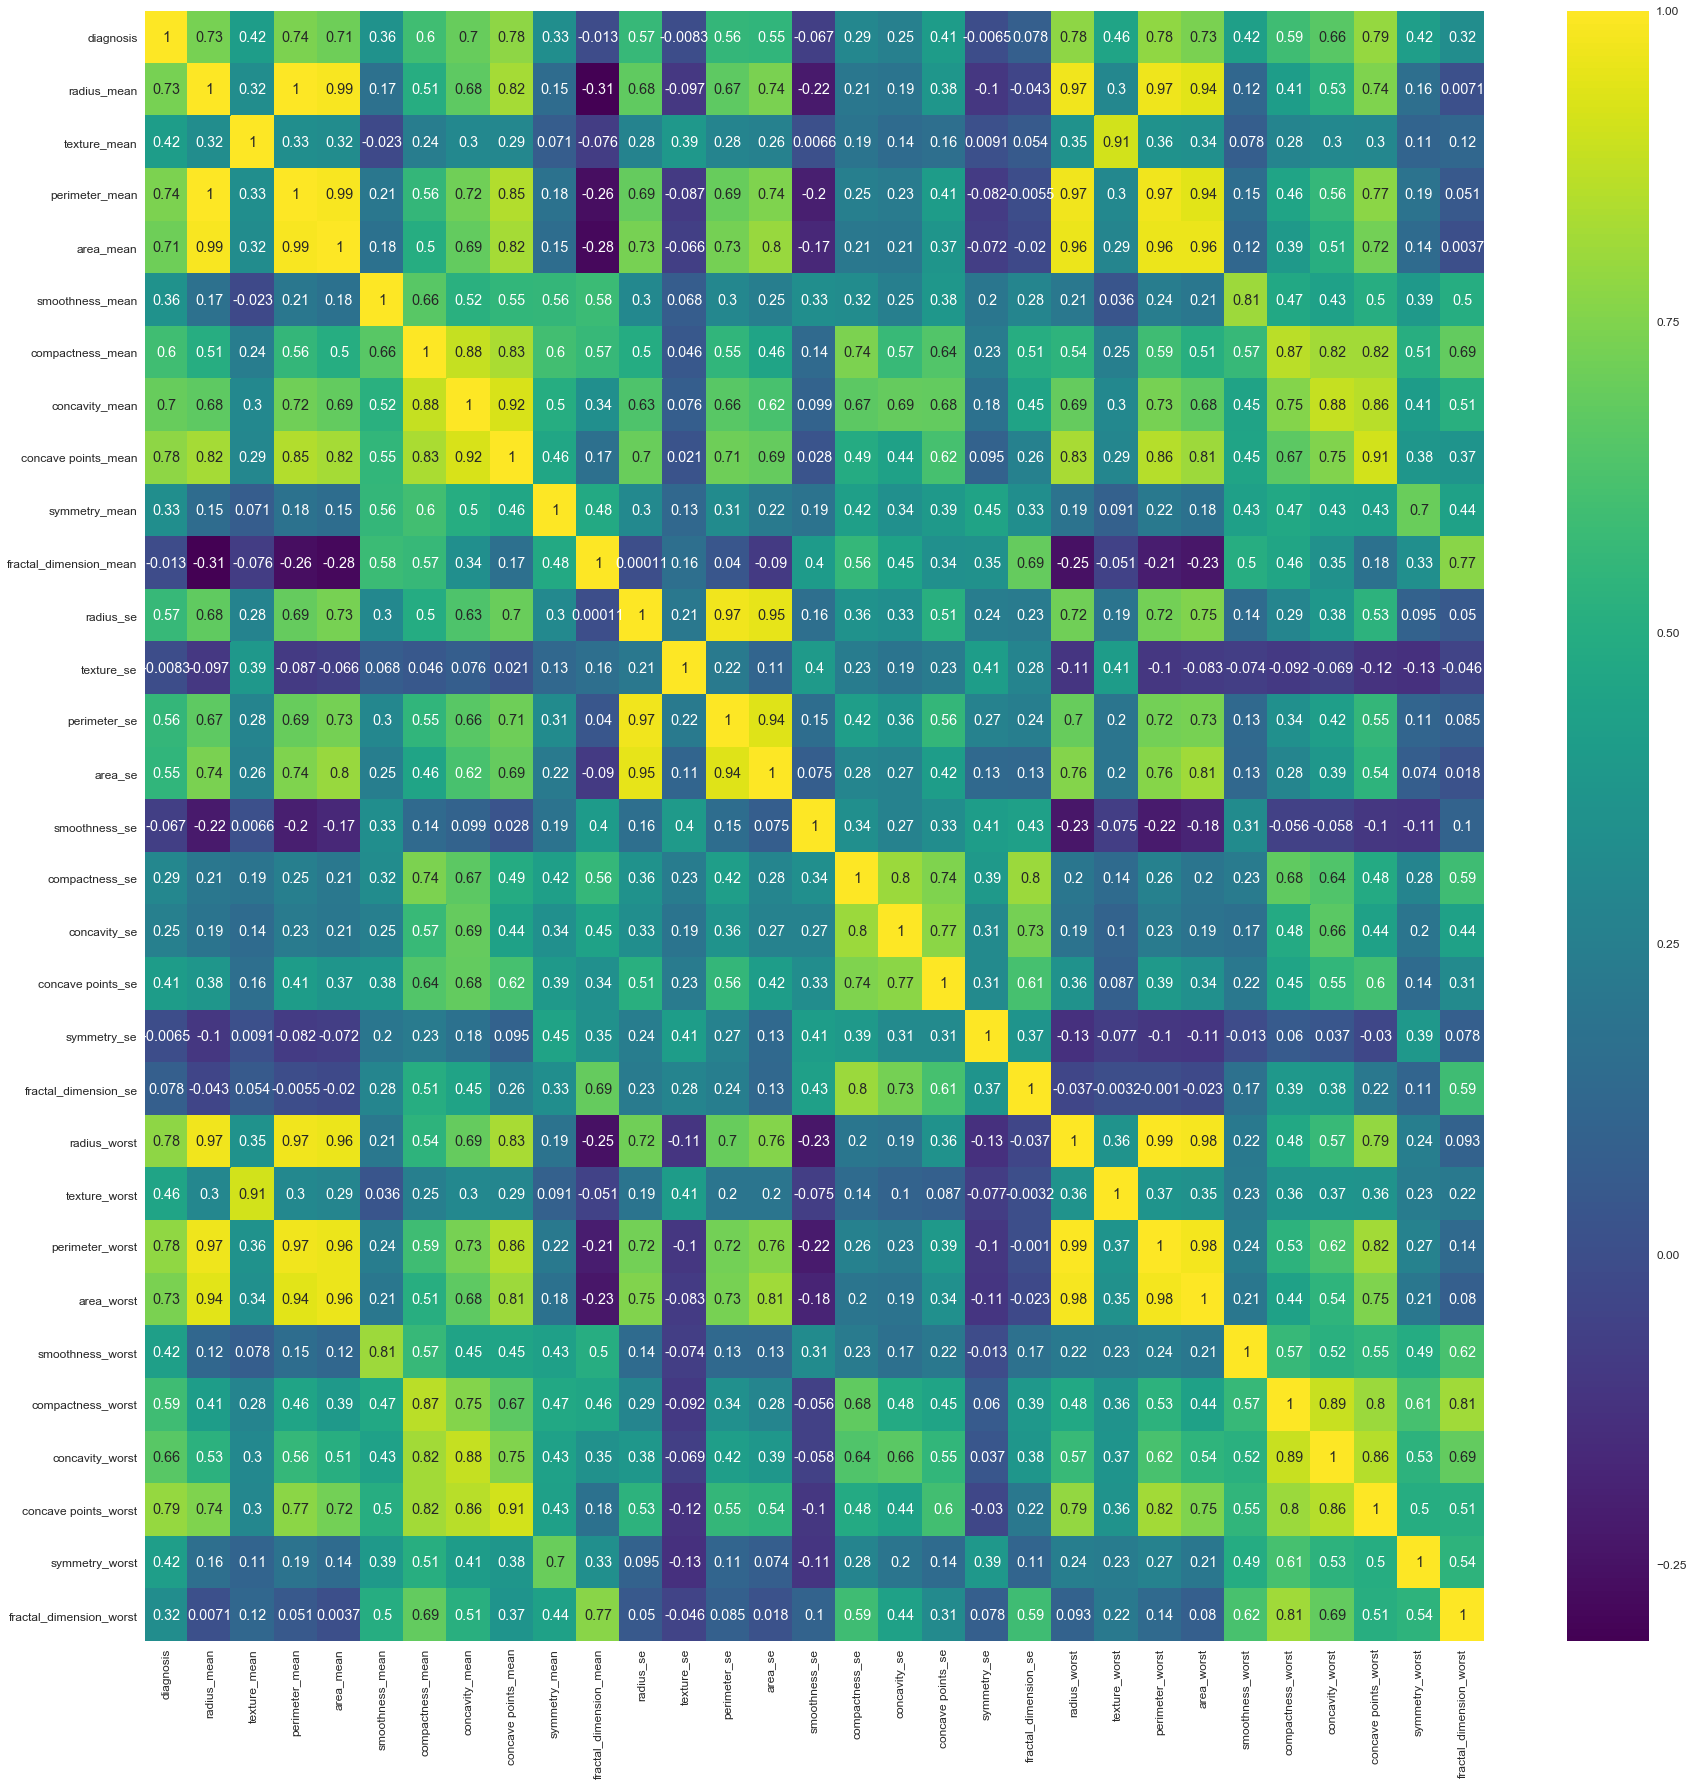

In [19]:
corr = _df
plt.figure(figsize=(30,30))
sb.heatmap(corr.corr(), annot=True, cmap='viridis')

Here are the vectorised components.

In [20]:
pca.components_.T

array([[ 0.21691695, -0.07760994, -0.10382598],
       [ 0.21639914, -0.22654473,  0.00252701],
       [ 0.10359936, -0.05826196,  0.05475076],
       [ 0.2245478 , -0.20762951,  0.00185393],
       [ 0.21796464, -0.22322434,  0.04015101],
       [ 0.13764549,  0.18876038, -0.10283457],
       [ 0.23150388,  0.15847307, -0.06714559],
       [ 0.25122179,  0.06786768,  0.01047679],
       [ 0.2552664 , -0.02722028, -0.01704756],
       [ 0.1330126 ,  0.19321967, -0.04031047],
       [ 0.05797189,  0.36761956, -0.02450881],
       [ 0.20090409, -0.09715581,  0.27490993],
       [ 0.01547414,  0.09118826,  0.36159518],
       [ 0.20563036, -0.08069084,  0.27380074],
       [ 0.19798194, -0.14355563,  0.22546846],
       [ 0.01123624,  0.20531469,  0.30017483],
       [ 0.1619218 ,  0.23886735,  0.15800472],
       [ 0.14578435,  0.203226  ,  0.18043615],
       [ 0.1762679 ,  0.13704859,  0.22824388],
       [ 0.03832541,  0.1860032 ,  0.28280286],
       [ 0.09508414,  0.28433173,  0.211

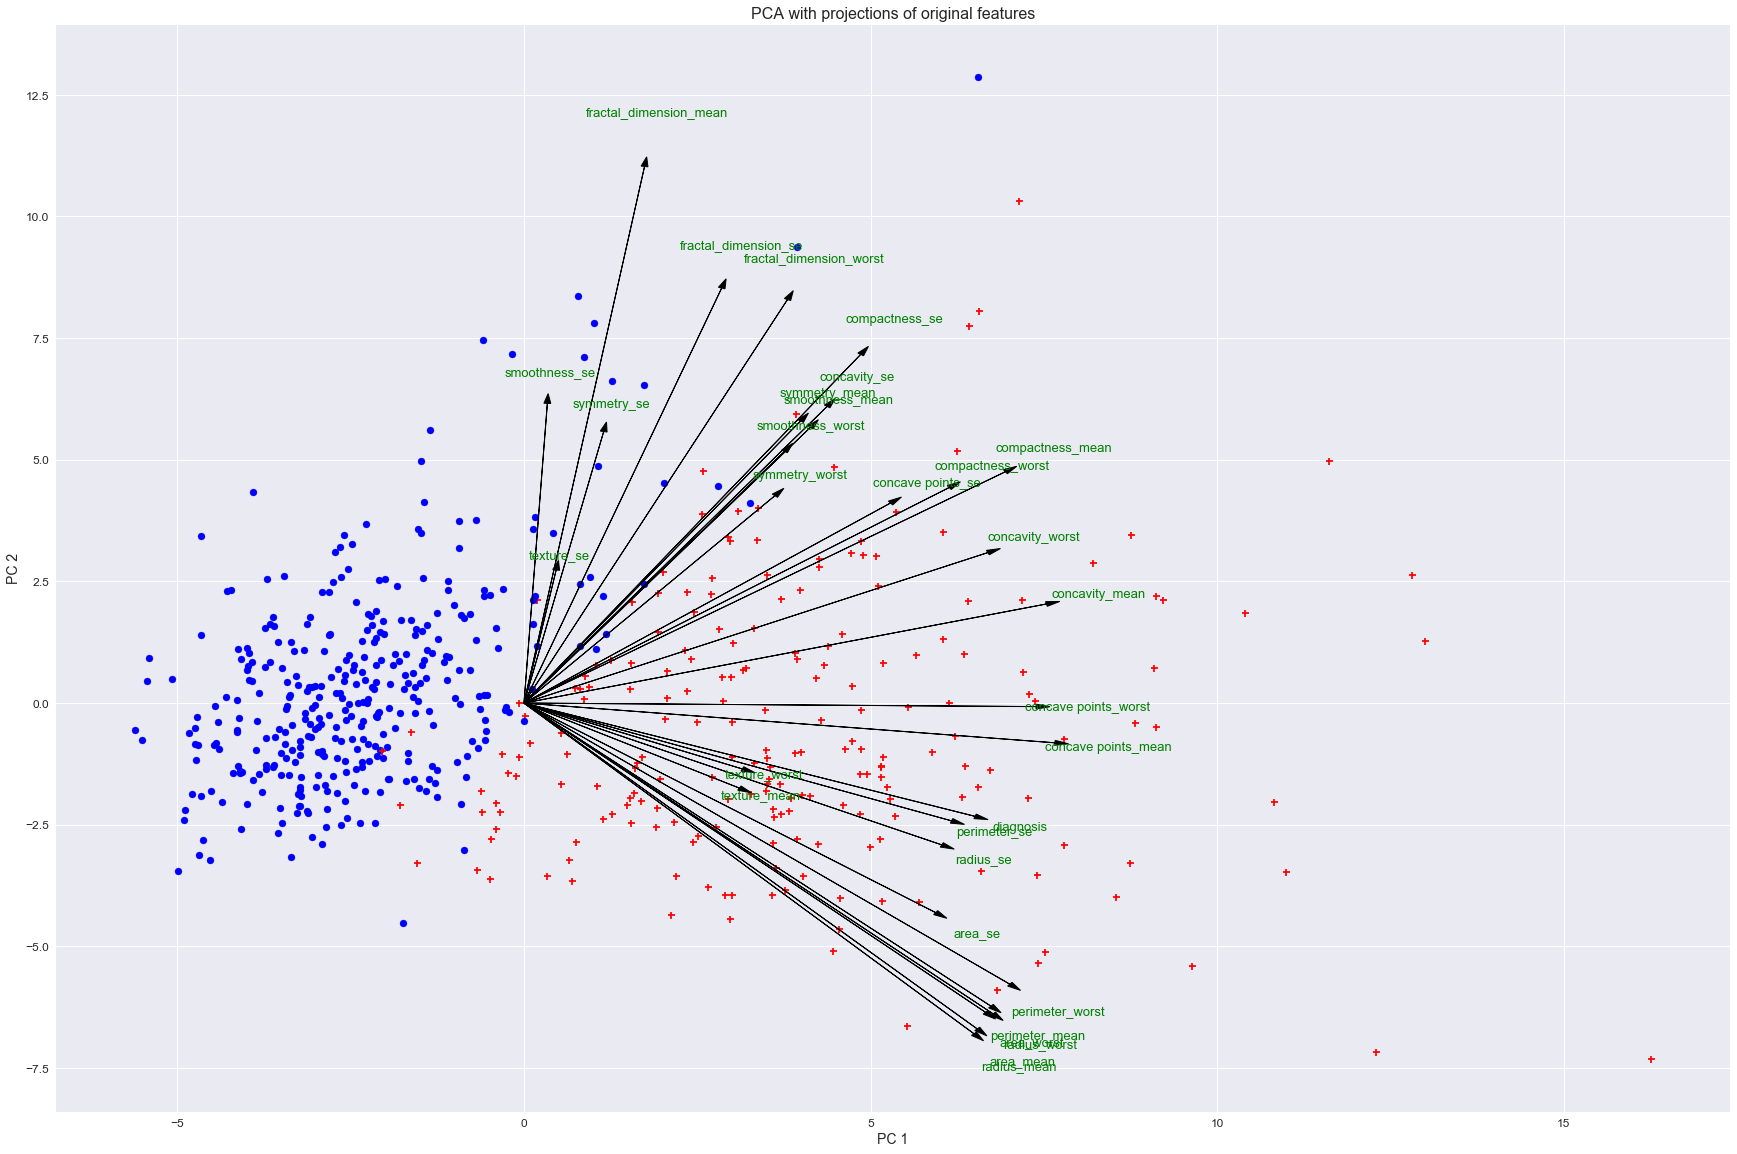

In [35]:
def biplot(pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    r = df.shape[0]

    for i in range(r):

        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        ax.scatter(xPCA[i,0],xPCA[i,1], color=color, label=label, marker=marker)
    
    
    feature_vectors = pca.components_.T
    scale = 15.0
    arrow_size, text_pos = scale + 15.0, scale + 18.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[0]*text_pos, v[1]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=13)
        
    ax.set_xlabel("PC 1", fontsize=14)
    ax.set_ylabel("PC 2", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(pca)

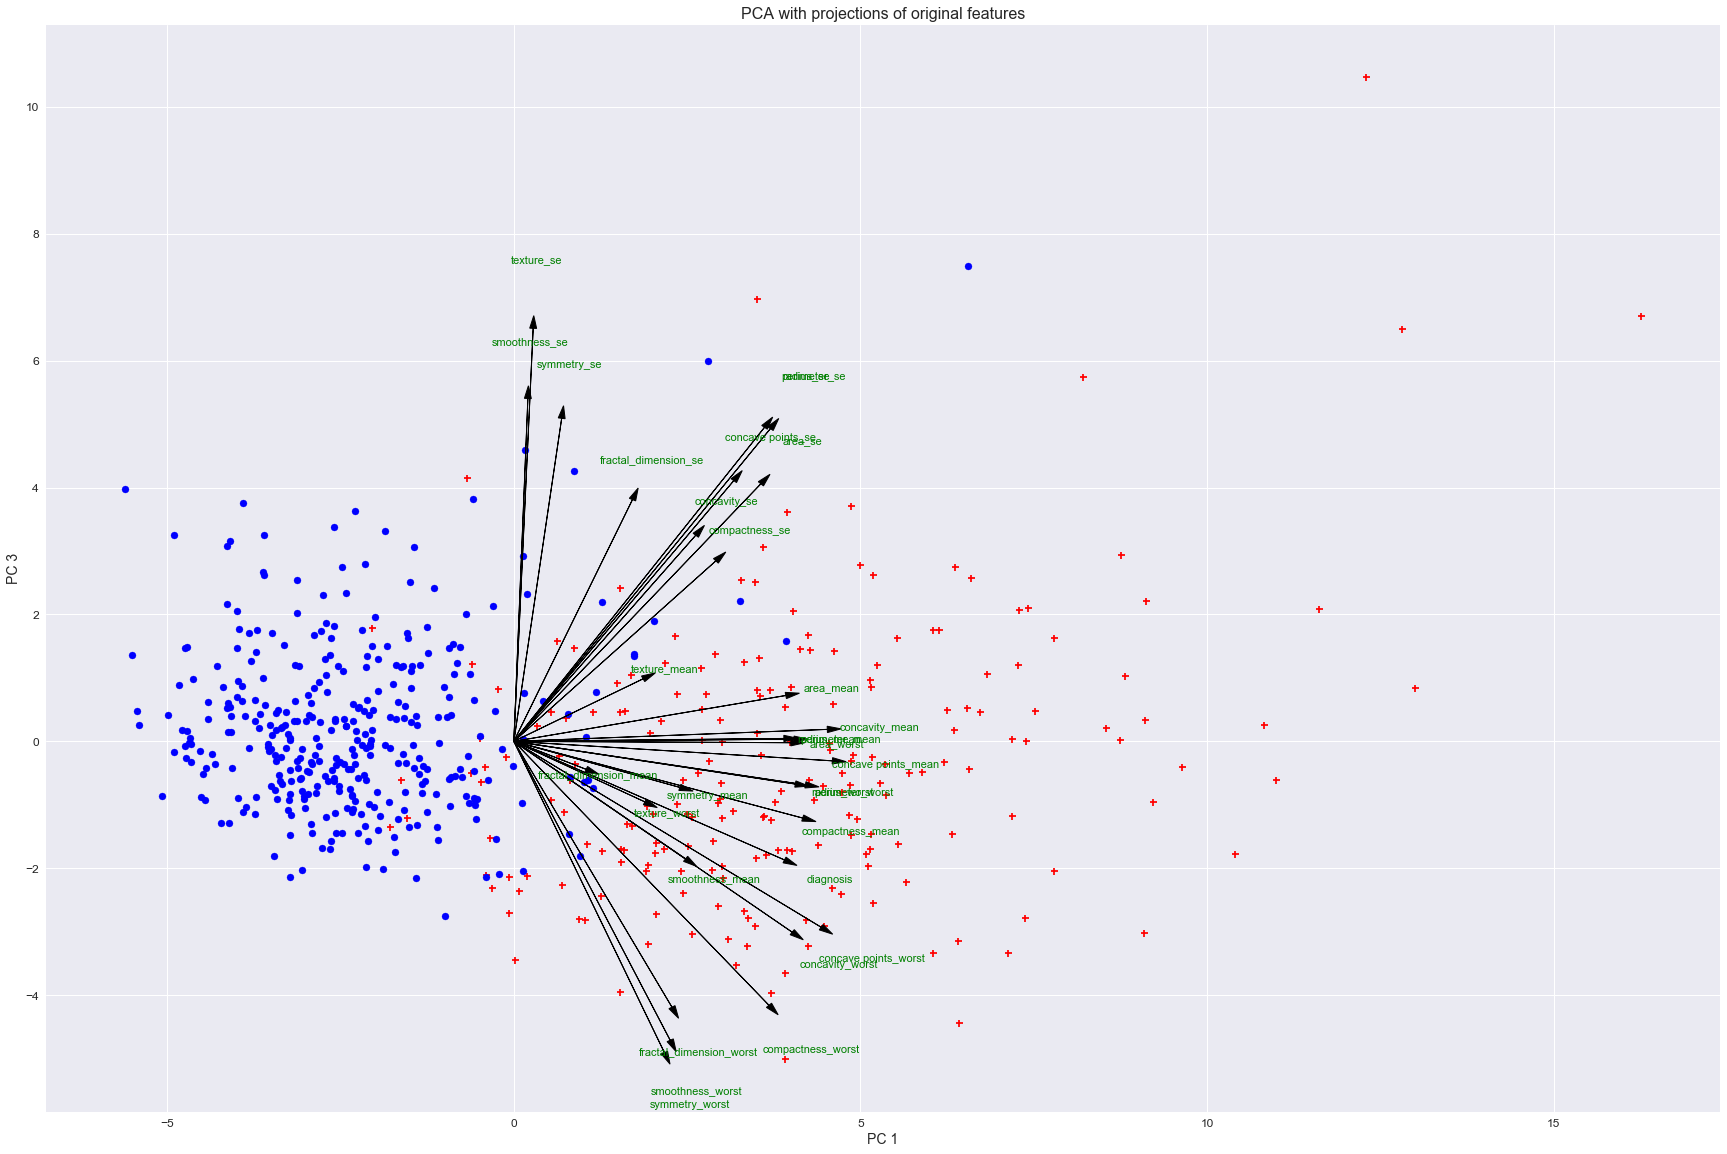

In [36]:
def biplot(pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    
    r = df.shape[0]

    for i in range(r):
    
        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        plt.scatter(xPCA[i,0],xPCA[i,2], marker=marker , color=color, label=label)
    
    
    feature_vectors = pca.components_.T
    scale = 8.0
    arrow_size, text_pos = scale + 10.0, scale + 13.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[2], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[0]*text_pos, v[2]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=11)
        
    ax.set_xlabel("PC 1", fontsize=14)
    ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(pca)

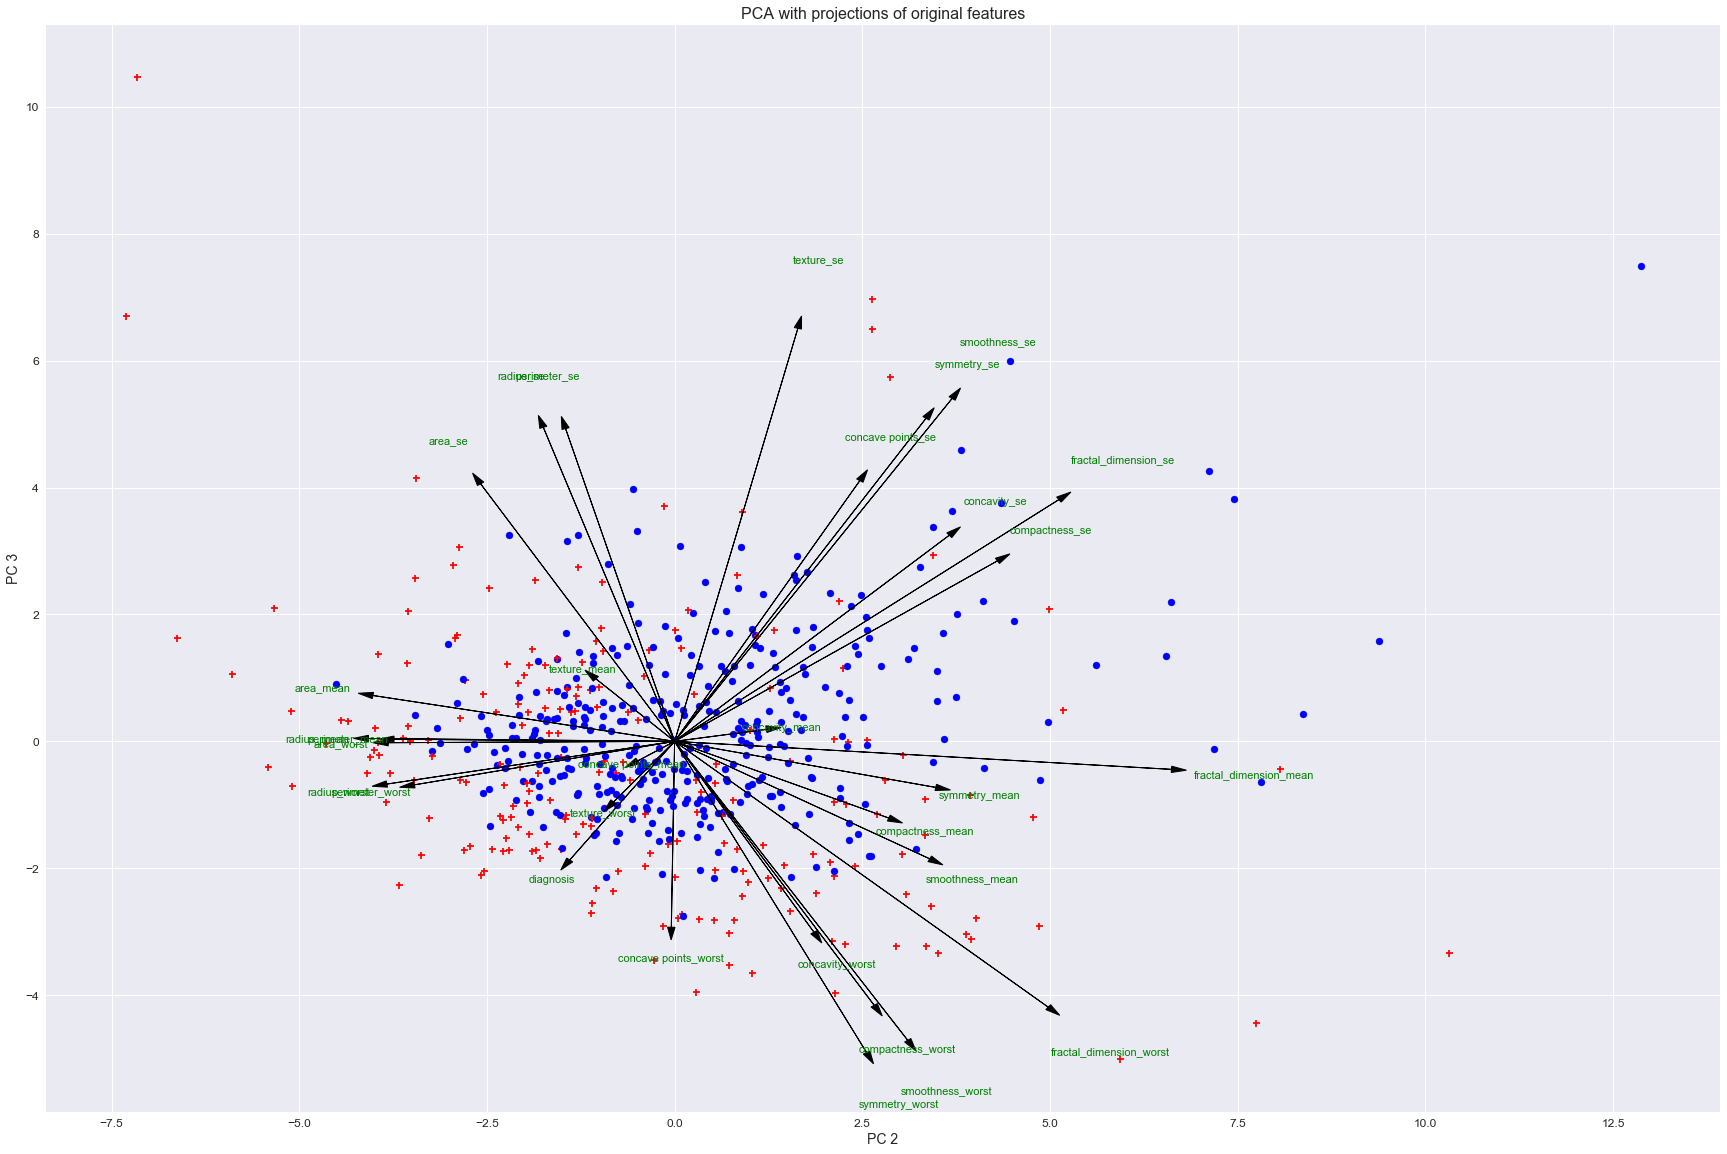

In [37]:
def biplot(pca):
    
    fig, ax = plt.subplots(figsize = (30,20))
    
    
    r = df.shape[0]

    for i in range(r):
    
        if df.iloc[i][0]:
            marker = '+'
            color='red'
            label='Malignant'
        else:
            marker = 'o'
            color='blue'
            label='Benign'

        plt.scatter(xPCA[i,1],xPCA[i,2], marker=marker , color=color, label=label)
    
    
    feature_vectors = pca.components_.T
    scale = 8.0
    arrow_size, text_pos = scale + 10.0, scale + 13.0

    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[1], arrow_size*v[2], head_width=0.1, head_length=0.2, linewidth=1, color='black')
        ax.text(v[1]*text_pos, v[2]*text_pos, df.columns[i], color='green', ha='center', va='center', fontsize=11)
        
    ax.set_xlabel("PC 2", fontsize=14)
    ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PCA with projections of original features", fontsize=16);
    return ax

biplot(pca)

# Evaluating and Fine Tuning the Model

## Training the Model with the selected features.

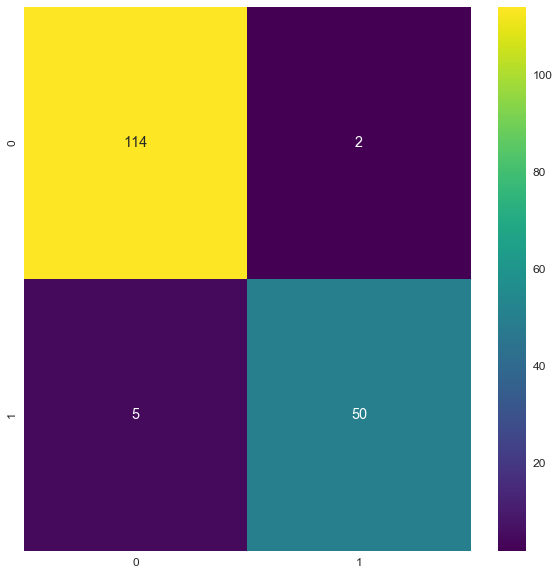

In [53]:
processingList = ['perimeter_se','radius_mean','concave points_worst','texture_worst','symmetry_se']

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score


X = df.drop(['diagnosis'], axis=1)
Y = df['diagnosis'].values
X = X[processingList]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=7, test_size=0.3)

##Here is the model.
clf_rf_0 = RandomForestClassifier(random_state=7).fit(X_train,Y_train)
clf_rf_1 = RandomForestClassifier(random_state=7)

cm = confusion_matrix(Y_test, clf_rf_0.predict(X_test))

plt.figure(figsize=(10,10))

sb.heatmap(cm, annot=True,cmap='viridis',fmt='g')

In [54]:
kfold = StratifiedKFold(n_splits=10, random_state=7)

scoreType = ['accuracy','average_precision','recall','f1']
score = []

for metric in scoreType:
    score.append((metric,cross_val_score(clf_rf_1, X, Y, cv=kfold, scoring=metric).mean()))
    
for i in score:
    print(i)

('accuracy', 0.9527784979690607)
('average_precision', 0.9660332661985052)
('recall', 0.9339826839826839)
('f1', 0.9365050048282679)


## Analysis of Receiver Operating Characteristic (ROC) 

In [55]:
def plot_roc_curve(clf,X,Y):
    y_scores = clf.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(Y, y_scores[:,1])
    roc_auc = roc_auc_score(Y,y_scores[:,1])
    plt.title('Receiver Operating Characteristic', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.plot(fpr, tpr, label='ROC curve (area under curve = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.legend(loc="lower right", prop={'size': 30})

Looking at the ROC, at around X 0.1 and Y 0.9 seems to be the best threshhold to maximise the usefulness of the model to capture all maligant points.

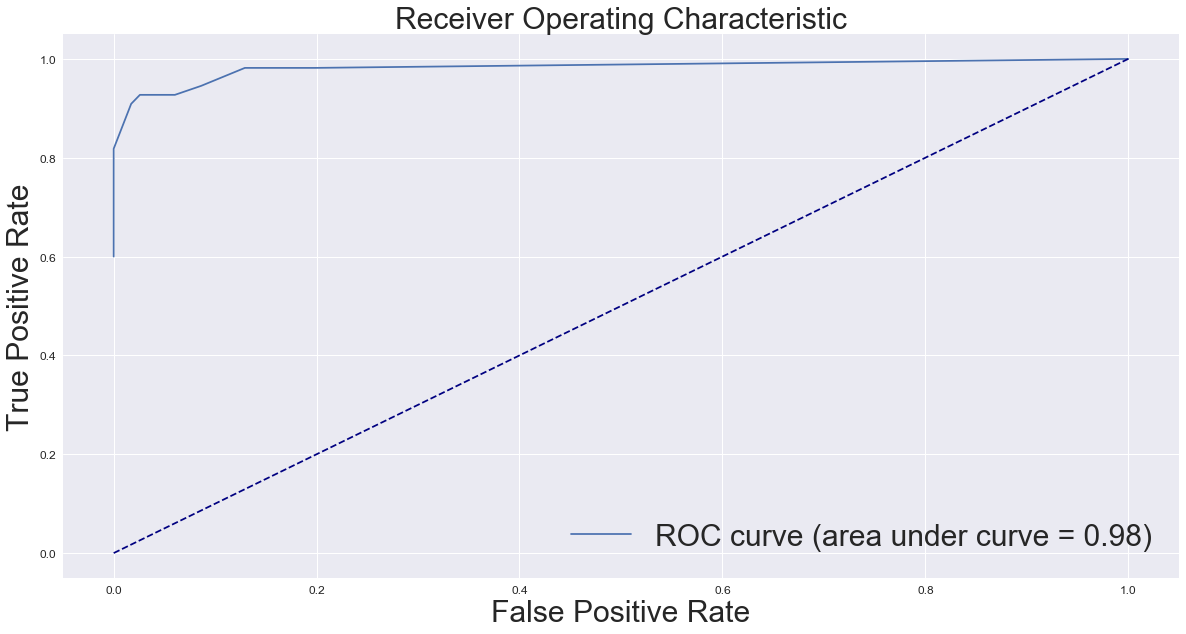

In [56]:
plt.figure(figsize=(20,10))
plot_roc_curve(clf_rf_0, X_test ,Y_test)